In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

In [2]:
df = pd.read_csv("/Users/pavanpss/Downloads/google-play-store-apps/googleplaystore.csv")
print("Number of data points:",df.shape[0])

Number of data points: 10841


In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df = df[df["Rating"]<=5]

In [8]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [9]:
CategoryString = df["Category"]
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category"] = df["Category"].map(category_dict).astype(int)

In [11]:
df["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [12]:
genresString = df["Genres"]
genresVal = df["Genres"].unique()
genresValCount = len(genresVal)
genres_dict = {}
for i in range(0,genresValCount):
    genres_dict[genresVal[i]] = i
df["Genres"] = df["Genres"].map(genres_dict).astype(int)

In [13]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [14]:
df['Content Rating'] = df['Content Rating'].map({'Everyone':0,'Teen':1,'Everyone 10+':2,'Mature 17+':3,'Adults only 18+':4}).astype(float)

In [15]:
df['Reviews'] = [ float(i.split('M')[0]) if 'M'in i  else float(i) for i in df['Reviews']]

In [16]:
df["Size"] = [ float(i.split('M')[0]) if 'M' in i else float(0) for i in df["Size"]  ]

In [17]:
df['Price'] = [ float(i.split('$')[1]) if '$' in i else float(0) for i in df['Price'] ]

In [19]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [20]:
df["Installs"] = [ float(i.replace('+','').replace(',', '')) if '+' in i or ',' in i else float(0) for i in df["Installs"] ]

In [21]:
df.drop(["Last Updated","Current Ver","Android Ver","App","Type"],axis=1,inplace=True)

In [22]:
df["Rating"] = df.groupby("Category")["Rating"].transform(lambda x: x.fillna(x.mean()))
df["Content Rating"] = df[["Content Rating"]].fillna(method="ffill")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 8 columns):
Category          9366 non-null int64
Rating            9366 non-null float64
Reviews           9366 non-null float64
Size              9366 non-null float64
Installs          9366 non-null float64
Price             9366 non-null float64
Content Rating    9366 non-null float64
Genres            9366 non-null int64
dtypes: float64(6), int64(2)
memory usage: 658.5 KB


In [25]:
df.shape

(9366, 8)

In [26]:
df.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,0,4.1,159.0,19.0,10000.0,0.0,0.0,0
1,0,3.9,967.0,14.0,500000.0,0.0,0.0,1
2,0,4.7,87510.0,8.7,5000000.0,0.0,0.0,0
3,0,4.5,215644.0,25.0,50000000.0,0.0,1.0,0
4,0,4.3,967.0,2.8,100000.0,0.0,0.0,2


In [27]:
df.describe()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
count,9366.000000,9366.000000,9.366000e+03,9366.000000,9.366000e+03,9366.000000,9366.000000,9366.000000
mean,17.783152,4.191757,5.140498e+05,18.933216,1.789744e+07,0.960928,0.349455,49.810912
std,7.331249,0.515219,3.144042e+06,23.023297,9.123822e+07,15.816585,0.781885,34.102471
min,0.000000,1.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,14.000000,4.000000,1.862500e+02,2.400000,1.000000e+04,0.000000,0.000000,19.000000
50%,18.000000,4.300000,5.930500e+03,9.500000,5.000000e+05,0.000000,0.000000,38.000000
75%,23.000000,4.500000,8.153275e+04,27.000000,5.000000e+06,0.000000,0.000000,88.000000
max,32.000000,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,4.000000,114.000000


In [29]:
from sklearn.model_selection import train_test_split
X = df.drop(["Rating"],axis=1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6556, 7)
(2810, 7)
(6556,)
(2810,)


In [48]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

In [50]:
lab_enc = preprocessing.LabelEncoder()
y_train_enc = lab_enc.fit_transform(y_train)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
#using KD-tree
knn = KNeighborsClassifier(algorithm='kd_tree')
param_grid = {'n_neighbors':np.arange(1,100,2)} #params we need to try on classifier
gscv = GridSearchCV(knn,param_grid,cv=10,verbose=1)
gscv.fit(X_train_scaled,training_scores_encoded)
print("Best HyperParameter: ",gscv.best_params_)
print("Best Accuracy: %.2f%%"%(gscv.best_score_*100))

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best HyperParameter:  {'n_neighbors': 1}
Best Accuracy: 22.03%


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.7min finished


In [51]:
y_test = lab_enc.fit_transform(y_test)

Accuracy on test set: 4.73%
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



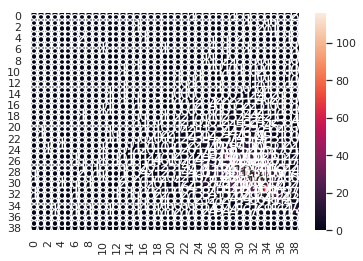

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sn

knen = KNeighborsClassifier(n_neighbors=1,algorithm='kd_tree')
knen.fit(X_train_scaled,training_scores_encoded)
y_pred = knen.predict(X_test_scaled)

print("Accuracy on test set: %0.2f%%"%(accuracy_score(y_test, y_pred)*100))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
final_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(39),range(39))
sn.set(font_scale=1)#for label size
sn.heatmap(final_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [58]:
knn = KNeighborsClassifier(algorithm='brute')
param_grid = {'n_neighbors':np.arange(1,100,2)} #params we need to try on classifier
gscv = GridSearchCV(knn,param_grid,cv=10,verbose=1)
gscv.fit(X_train_scaled,training_scores_encoded)
print("Best HyperParameter: ",gscv.best_params_)
print("Best Accuracy: %.2f%%"%(gscv.best_score_*100))

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best HyperParameter:  {'n_neighbors': 1}
Best Accuracy: 22.03%


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 10.9min finished


In [59]:
df.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,0,4.1,159.0,19.0,10000.0,0.0,0.0,0
1,0,3.9,967.0,14.0,500000.0,0.0,0.0,1
2,0,4.7,87510.0,8.7,5000000.0,0.0,0.0,0
3,0,4.5,215644.0,25.0,50000000.0,0.0,1.0,0
4,0,4.3,967.0,2.8,100000.0,0.0,0.0,2


Accuracy on test set: 4.73%
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



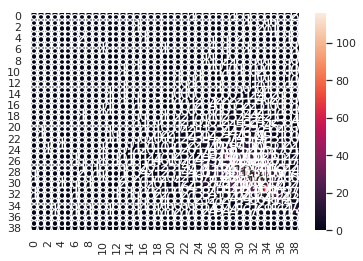

In [60]:
knen = KNeighborsClassifier(n_neighbors=1,algorithm='brute')
knen.fit(X_train_scaled,training_scores_encoded)
y_pred = knen.predict(X_test_scaled)

print("Accuracy on test set: %0.2f%%"%(accuracy_score(y_test, y_pred)*100))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
final_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(39),range(39))
sn.set(font_scale=1)#for label size
sn.heatmap(final_cm, annot=True,annot_kws={"size": 16}, fmt='g')